In [37]:
!head msak0_306.wav

NIST_1A
   1024
channel_count -i 1
sample_count -i 59484
sample_rate -i 16000
sample_coding -s3 pcm
sample_n_bytes -i 2
sample_byte_format -s2 01
microphone -s21 audio-technica ATM10a
recording_site -s33 Queen Margaret University College

In [38]:
!sox msak0_306.wav foo.raw

In [39]:
!play -s2L -r 16000 foo.raw


foo.raw: File Size: 119k      Bit Rate: 256k
  Encoding: Signed PCM    
  Channels: 1 @ 16-bit   
Samplerate: 16000Hz      
Replaygain: off         
  Duration: 00:00:03.72  


In:0.00% 00:00:00.00 [00:00:03.72] Out:0     [      |      ]        Clip:0    
In:68.9% 00:00:02.56 [00:00:01.16] Out:41.0k [   ===|===   ]        Clip:0    
In:82.6% 00:00:03.07 [00:00:00.65] Out:49.2k [   -==|==-   ]        Clip:0    
In:96.4% 00:00:03.58 [00:00:00.13] Out:57.3k [      |      ]        Clip:0    
In:100%  00:00:03.72 [00:00:00.00] Out:59.5k [      |      ]        Clip:0    
Done.

In [40]:
class Wave:
    pass

In [41]:
def read_lab(fname):
    result = []
    with open(fname) as stream:
        for line in stream.readlines():
            line = line[:-1]
            start,stop,label = line.split(" ",2)
            result.append((float(start),float(stop),label))
    return result
read_lab("msak0_306.lab")

[(0.0, 0.2, 'sil'),
 (0.2, 0.49, 'breath'),
 (0.49, 0.69, 'sil'),
 (0.69, 0.76, 'w'),
 (0.76, 0.89, 'ii'),
 (0.89, 0.94, 'l'),
 (0.94, 1.04, 'ai'),
 (1.04, 1.07, 'k'),
 (1.07, 1.17, 'b'),
 (1.17, 1.22, 'l'),
 (1.22, 1.33, 'uu'),
 (1.33, 1.45, 'ch'),
 (1.45, 1.59, 'ii'),
 (1.59, 1.68, 'z'),
 (1.68, 1.74, 'b'),
 (1.74, 1.82, '@'),
 (1.82, 1.85, 't'),
 (1.85, 1.92, 'v'),
 (1.92, 2.0, 'i'),
 (2.0, 2.04, 'k'),
 (2.04, 2.12, 't'),
 (2.12, 2.16, '@'),
 (2.16, 2.21, 'l'),
 (2.21, 2.31, 'ai'),
 (2.31, 2.34, 'k'),
 (2.34, 2.4, 's'),
 (2.4, 2.49, 'b'),
 (2.49, 2.58, 'r'),
 (2.58, 2.74, 'ii'),
 (2.74, 3.7, 'sil')]

In [42]:
import os
def read_data(fname):
    os.system("sox %s _temp.raw"%fname)
    data = numpy.fromfile("_temp.raw",'int16')
    wave = Wave() 
    base,_ = os.path.splitext(fname)
    wave.labels = read_lab(base+".lab")
    wave.data = data
    wave.rate = 16000.0
    return wave
wave = read_data("msak0_306.wav")

In [43]:
def play(data,pad=8000):
    data = r_[zeros(pad,data.dtype),data,zeros(pad,data.dtype)]
    data.tofile("_out.raw")
    os.system("play -s2L -r 16000 _out.raw")
play(wave.data)

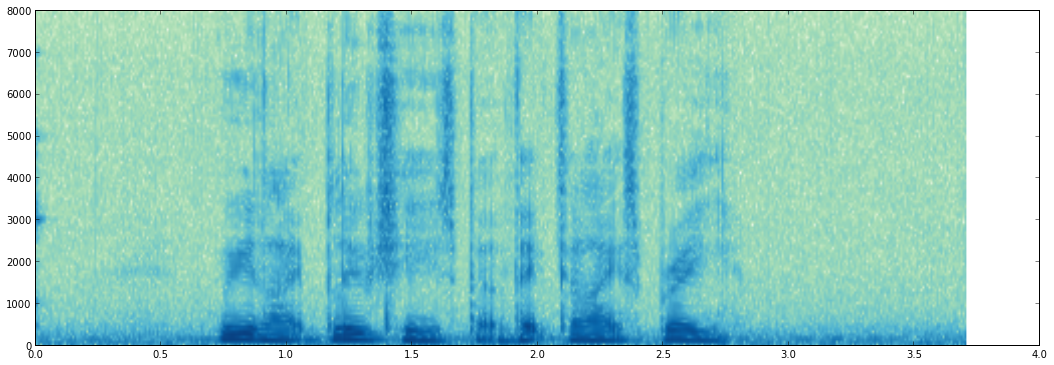

In [44]:
figsize(18,6)
_=specgram(wave.data,Fs=16000,cmap=cm.GnBu)

In [45]:
play(array(list(wave.data[int(2.1*16000):int(2.4*16000)])*10))

In [46]:
play(array(list(wave.data[int(1.4*16000):int(1.7*16000)])*10))

In [47]:
play(array(list(wave.data[int(1.35*16000):int(1.5*16000)])*10))

In [48]:
play(array(list(wave.data[int(1.51*16000):int(1.65*16000)])*20))

In [49]:
play(array(list(wave.data[int(2.5*16000):int(3.0*16000)])*10))

In [50]:
play(array(list(wave.data[int(0.7*16000):int(1.1*16000)])*10))

In [51]:
play(array(list(wave.data[int(0.9*16000):int(1.1*16000)])*10))

In [52]:
play(array(list(wave.data[int(0.7*16000):int(0.9*16000)])*10))

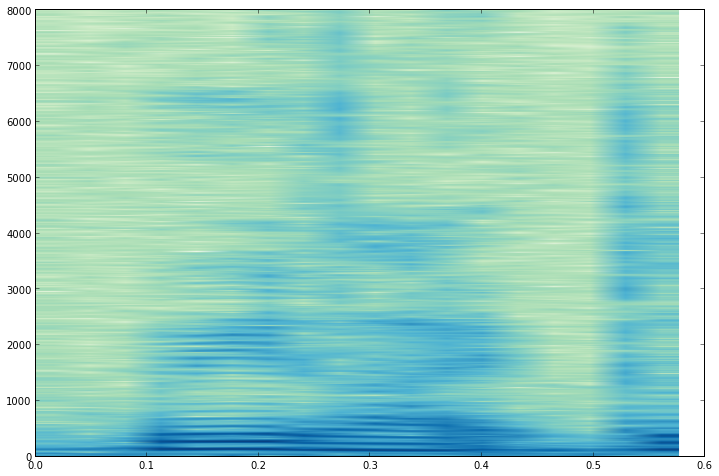

In [53]:
figsize(12,8)
_=specgram(wave.data[10000:20000],Fs=16000,NFFT=1024,noverlap=512,cmap=cm.GnBu)

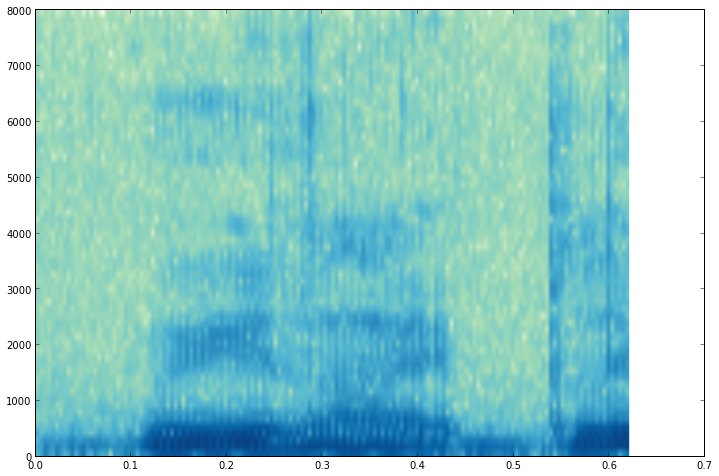

In [54]:
figsize(12,8)
_=specgram(wave.data[10000:20000],Fs=16000,NFFT=128,noverlap=64,cmap=cm.GnBu)

In [55]:
def phonemes(wave):
    for start,stop,label in wave.labels:
        start = int(wave.rate*start)
        stop = int(wave.rate*stop)
        #print start,stop,len(wave.data)
        clip = wave.data[start:stop]
        yield clip,label
clips = list(phonemes(wave))

In [56]:
import glob
samples = []
for fname in sorted(glob.glob("msak*.wav")):
    wave = read_data(fname)
    for clip,cls in phonemes(wave):
        samples.append((clip,cls))

In [57]:
len(samples)

15800

In [58]:
from collections import Counter

In [59]:
classes = [cls for clip,cls in samples]
Counter(classes)

Counter({'@': 1388, 'sil': 1380, 'i': 938, 't': 889, 'n': 840, 's': 698, 'l': 666, 'r': 615, 'k': 541, 'd': 536, 'z': 495, 'breath': 460, 'm': 420, 'p': 374, 'dh': 331, 'b': 309, 'ii': 305, 'e': 297, 'f': 264, 'uu': 263, 'ai': 251, 'ei': 249, 'w': 246, 'o': 230, 'a': 228, 'v': 227, 'oo': 203, 'ou': 202, 'y': 197, 'g': 195, 'uh': 186, 'iy': 167, 'h': 154, 'sh': 147, 'ng': 140, 'jh': 138, 'aa': 106, 'ch': 99, '@@': 90, 'ow': 87, 'th': 73, 'u': 54, 'oi': 44, 'eir': 33, 'i@': 28, 'zh': 17})

In [60]:
uu = [clip for clip,cls in samples if cls=="uu"]
len(uu)

263

In [61]:
for c in uu[:10]: play(c)

In [62]:
ii = [clip for clip,cls in samples if cls=="ii"]
len(ii)

305

In [63]:
sh = [clip for clip,cls in samples if cls=="sh"]
len(sh)

147

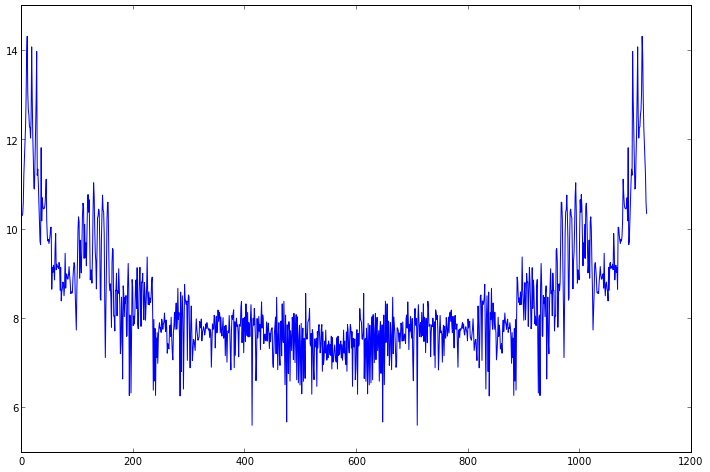

In [64]:
from pylab import *
plot(log(1+abs(fft(uu[0]))))

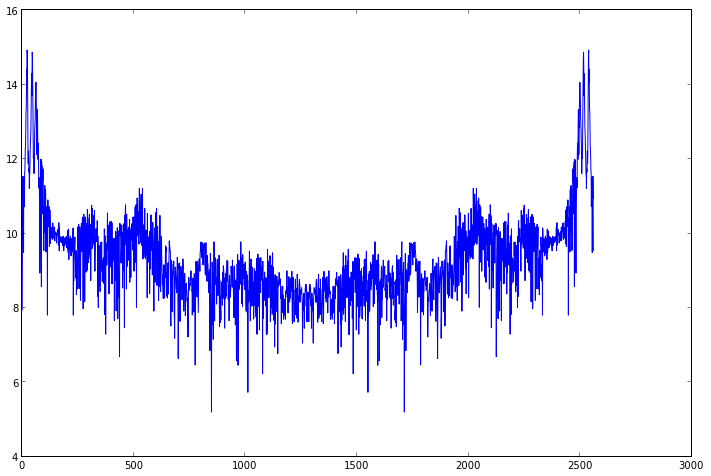

In [65]:
plot(log(1+abs(fft(ii[0]))))

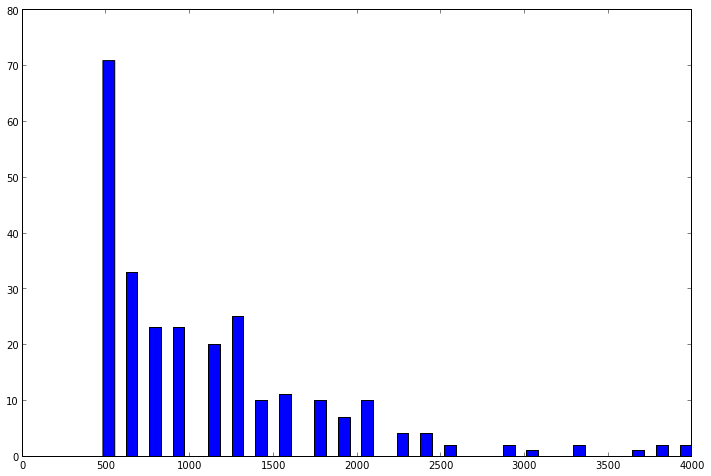

In [66]:
_=hist([len(c) for c in uu],bins=50)

([], <a list of 0 Text xticklabel objects>)

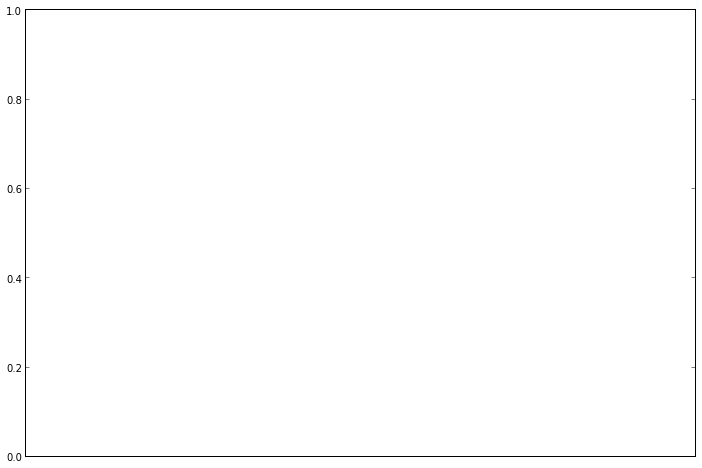

In [67]:
xticks([])

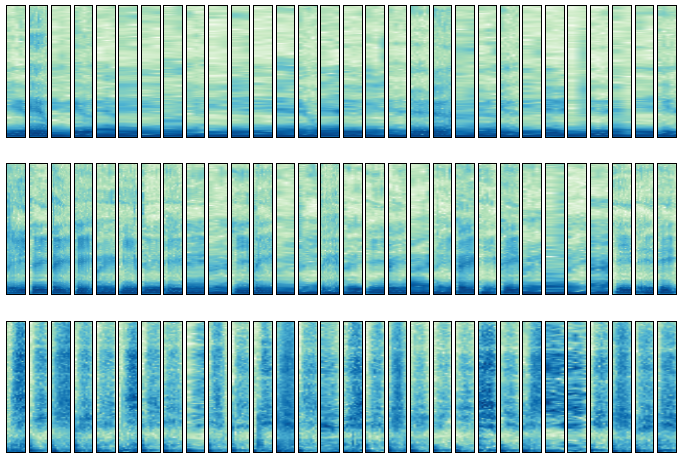

In [68]:
for i in range(30):
    subplot(3,30,i+1); xticks([]); yticks([])
    _=specgram(uu[i],NFFT=256,noverlap=64,cmap=cm.GnBu)
for i in range(30):
    subplot(3,30,i+31); xticks([]); yticks([])
    _=specgram(ii[i],NFFT=256,noverlap=64,cmap=cm.GnBu)
for i in range(30):
    subplot(3,30,i+61); xticks([]); yticks([])
    _=specgram(sh[i],NFFT=256,noverlap=64,cmap=cm.GnBu)

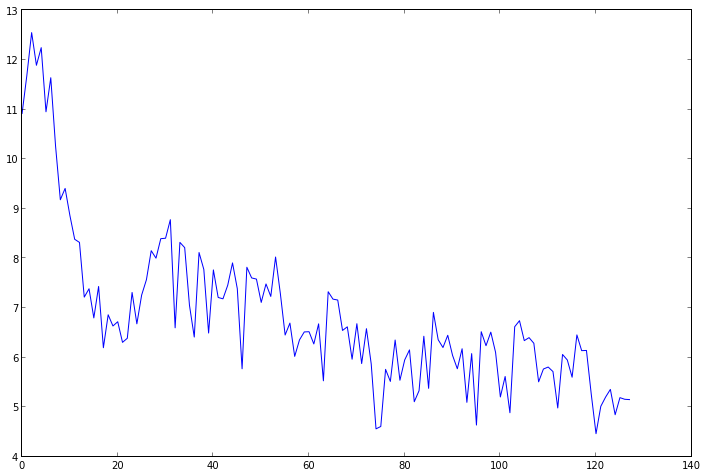

In [69]:
def windowed_spec(data):
    n = len(data)
    w = (arange(n)-n/2.0)**2
    w /= amax(w)
    w = 1-w
    return log(abs(fft(w*data)))[:n//2]
plot(windowed_spec(uu[0][:256]))

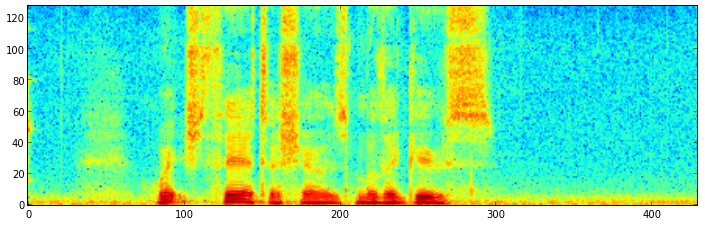

In [70]:
spec = array([windowed_spec(wave.data[i:i+256]) for i in range(0,len(wave.data)-256,128)])
imshow(spec.T,origin='lower')

In [71]:
play(wave.data)